# Dados e bibliotecas

In [1]:
from bs4 import BeautifulSoup
import os

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Lendo arquivo de entrada e salvando em arquivos

In [2]:
FOLDERIN = "datasets"
FOLDERTEMP = os.path.join(FOLDERIN, "folha")
FILEIN = "CETENFolha-1.0"
FILEOUTEXT = "temp"

CODEPAGES = ["iso-8859-1", "cp1252","utf-8","utf-32","utf-16"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos
NCOLS = 256

In [3]:
for cps in CODEPAGES:
    os.makedirs(os.path.join(FOLDERTEMP, cps), exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory datasets\folha is created!


In [4]:
f = open(os.path.join(FOLDERIN, FILEIN),"r",encoding="cp1252")

print(f.encoding)

ff = {}

lcounter = 0
fcounter = 0
try:
    for line in f:
        if lcounter % SIZEMINIFILE == 0: # if it is a new file
            for cps in CODEPAGES: # open all files
                ff[cps] = open(
                    os.path.join(FOLDERTEMP, cps, f"{fcounter}.{FILEOUTEXT}"),
                    "w", encoding=cps
                )
        cleantext = BeautifulSoup(line, "lxml").text # Limpa HTML
        for cps in CODEPAGES: # write in all files
            ff[cps].write(cleantext)
        lcounter += 1 # a new line done
        if lcounter % SIZEMINIFILE == 0: # lines enough
            if fcounter % 100 == 0 : 
                print(fcounter, lcounter) 
            for cps in CODEPAGES: # close all files
                ff[cps].close()
            fcounter += 1 # it is a new file
        if fcounter> TOTALFILES: # it is ok of files
            print("Breaking...")
            break
finally:
    for cps in CODEPAGES:
        ff[cps].close()

f.close()
print("End... Total set of files {fcounter}")

cp1252
0 50
100 5050
200 10050
300 15050
400 20050
500 25050
600 30050
700 35050
800 40050
900 45050
1000 50050
Breaking...
End... Total set of files {fcounter}


## Leitura dos dados no novo formato

In [5]:
def read_chunk(file_object, chunk_size=1):
    while True:
        file =  file_object.read(chunk_size)
        if not file:
            break
        yield file
        
def read_data(FOLDERTEMP, CODEPAGES, NCOLS):
    allfiles = []

    for path, subdirs, files in os.walk(FOLDERTEMP):
        for name in files:
            for cps in CODEPAGES:
                if cps in path:
                    allfiles.append(os.path.join(path, name))

    X = np.zeros((len(allfiles), NCOLS), float)
    y = np.zeros(len(allfiles), int)

    for i, file in enumerate(allfiles):
        if i % 100 == 0:
            print(f"Reading file {file}")
        for j in range(len(CODEPAGES)):
            if file.find(CODEPAGES[j]) > -1:
                y[i] = j
        with open(file,"rb") as f:
            for byte in read_chunk(f,1):
                number = int.from_bytes(byte,"big")
                X[i,number] += 1
    X = (X.T / X.sum(1)).T
    return X, y

In [6]:
X, y = read_data(FOLDERTEMP, CODEPAGES, NCOLS)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Reading file datasets\folha\cp1252\0.temp
Reading file datasets\folha\cp1252\188.temp
Reading file datasets\folha\cp1252\278.temp
Reading file datasets\folha\cp1252\368.temp
Reading file datasets\folha\cp1252\458.temp
Reading file datasets\folha\cp1252\548.temp
Reading file datasets\folha\cp1252\638.temp
Reading file datasets\folha\cp1252\728.temp
Reading file datasets\folha\cp1252\818.temp
Reading file datasets\folha\cp1252\908.temp
Reading file datasets\folha\cp1252\999.temp
Reading file datasets\folha\iso-8859-1\187.temp
Reading file datasets\folha\iso-8859-1\277.temp
Reading file datasets\folha\iso-8859-1\367.temp
Reading file datasets\folha\iso-8859-1\457.temp
Reading file datasets\folha\iso-8859-1\547.temp
Reading file datasets\folha\iso-8859-1\637.temp
Reading file datasets\folha\iso-8859-1\727.temp
Reading file datasets\folha\iso-8859-1\817.temp
Reading file datasets\folha\iso-8859-1\907.temp
Reading file datasets\folha\iso-8859-1\998.temp
Reading file datasets\folha\utf-16\186

# Identificando o encoding (5 encondings)

In [7]:
# funcao para facilitar a visualizacao da matriz da confusao
def plot_confusion_matrix(y_test, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set_title("Confusion Matrix")

    ax.imshow(confusion_matrix, cmap = 'coolwarm')

    for (i, j), z in np.ndenumerate(confusion_matrix):
        ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

## Árvore de decisão

Decision Tree


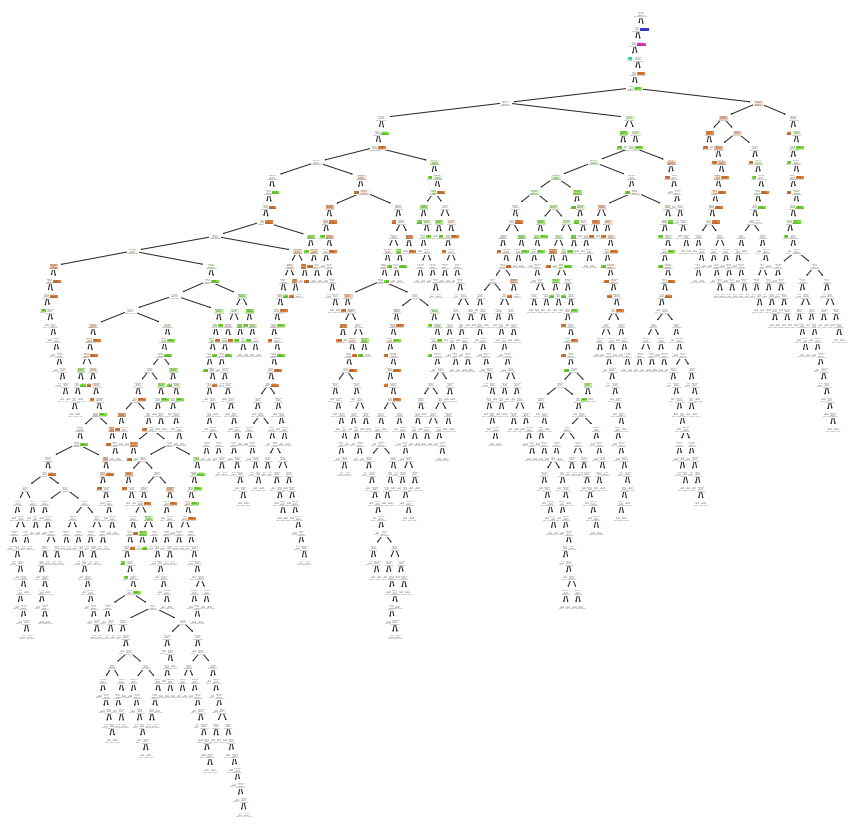

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

Accuracy:  0.6478029294274301


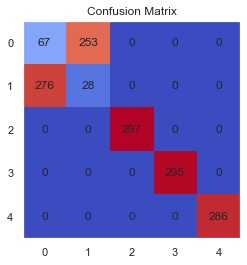

In [9]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

# Removendo o *latin_1*

In [10]:
CODEPAGES = ["cp1252","utf-8","utf-32","utf-16"]

In [11]:
X, y = read_data(FOLDERTEMP, CODEPAGES, NCOLS)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Reading file datasets\folha\cp1252\0.temp
Reading file datasets\folha\cp1252\188.temp
Reading file datasets\folha\cp1252\278.temp
Reading file datasets\folha\cp1252\368.temp
Reading file datasets\folha\cp1252\458.temp
Reading file datasets\folha\cp1252\548.temp
Reading file datasets\folha\cp1252\638.temp
Reading file datasets\folha\cp1252\728.temp
Reading file datasets\folha\cp1252\818.temp
Reading file datasets\folha\cp1252\908.temp
Reading file datasets\folha\cp1252\999.temp
Reading file datasets\folha\utf-16\187.temp
Reading file datasets\folha\utf-16\277.temp
Reading file datasets\folha\utf-16\367.temp
Reading file datasets\folha\utf-16\457.temp
Reading file datasets\folha\utf-16\547.temp
Reading file datasets\folha\utf-16\637.temp
Reading file datasets\folha\utf-16\727.temp
Reading file datasets\folha\utf-16\817.temp
Reading file datasets\folha\utf-16\907.temp
Reading file datasets\folha\utf-16\998.temp
Reading file datasets\folha\utf-32\186.temp
Reading file datasets\folha\utf-32

## k-Means

In [12]:
n_clusters = 4

kmeans = KMeans(n_clusters)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Abaixo definiremos funções para calcular a similaridade de um grupo encontrado pelo k-Means com um grupo do dataset original para determinar se os grupos encontrados pelo algoritmo se relacionam com os grupos originais.

In [13]:
def calc_similarity(y, y_pred):
    possible_classes = np.unique(np.concatenate([np.unique(y), np.unique(y_pred)]))
    n_classes = len(possible_classes)
    
    similarity = np.zeros((n_classes, n_classes), float)
    
    for i, c1 in enumerate(possible_classes):
        true_members = (y == c1)
        for j, c2 in enumerate(possible_classes):
            pred_members = (y_pred == c2)
            
            intersection = true_members & pred_members
            union = true_members | pred_members
            
            similarity[i, j] = intersection.sum() / union.sum()
    return similarity

def map_classes(y, y_pred):
    similarity = calc_similarity(y, y_pred)
    mapping = similarity.argmax(0)
    
    new_y = np.zeros_like(y_pred)
    
    for i, j in enumerate(mapping):
        new_y[y_pred == i] = j
    return new_y

In [14]:
new_y = map_classes(y, y_pred)

Accuracy:  0.9992507492507493


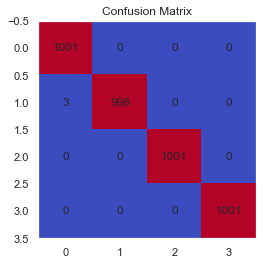

In [15]:
print("Accuracy: ",metrics.accuracy_score(y, new_y))
plot_confusion_matrix(y, new_y)

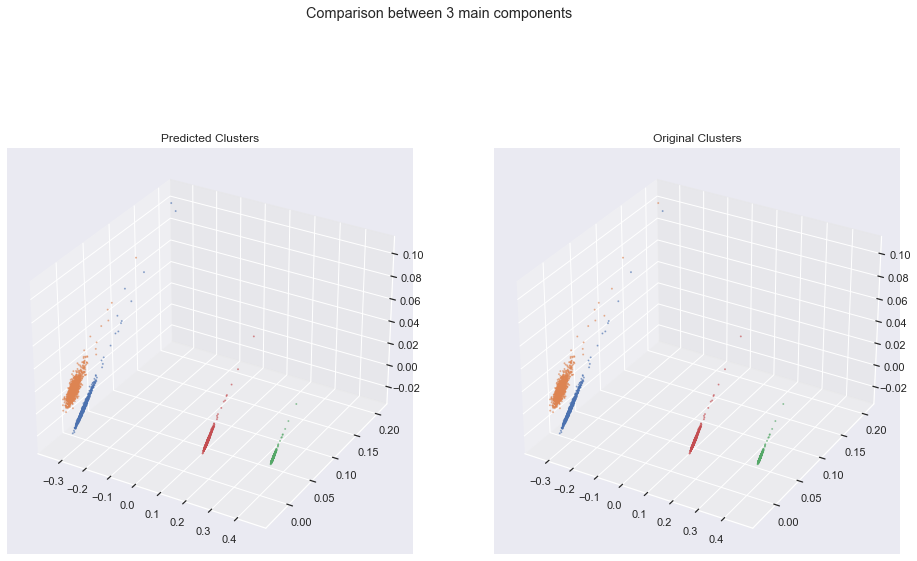

In [16]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize = (16, 10), subplot_kw = {'projection': '3d'})
fig.suptitle("Comparison between 3 main components")
colors = sns.color_palette()

axes[0].set_title('Predicted Clusters')
for i in range(n_clusters):
    selected_points = pca_result[new_y == i, :]
    axes[0].scatter(*(selected_points.T), color = colors[i], s = 1, alpha = 0.5)

axes[1].set_title('Original Clusters')
for i in range(n_clusters):
    selected_points = pca_result[y == i, :]
    axes[1].scatter(*(selected_points.T), color = colors[i], s = 1, alpha = 0.5)

# Mudando o dataset (e o idioma)

## Processando e carregando os dados

In [17]:
FOLDERIN = "datasets"
FOLDERTEMP = os.path.join(FOLDERIN, "don_quijote")
FILEIN = "don_quijote.txt"
FILEOUTEXT = "temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 500 # número de arquivos
NCOLS = 256

In [18]:
for cps in CODEPAGES:
    os.makedirs(os.path.join(FOLDERTEMP, cps), exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory datasets\don_quijote is created!


In [19]:
f = open(os.path.join(FOLDERIN, FILEIN),"r",encoding="utf-8")
[f.readline() for i in range(25)] # skip header text

print(f.encoding)

ff = {}

lcounter = 0
fcounter = 0
try:
    for line in f:
        if lcounter % SIZEMINIFILE == 0: # if it is a new file
            for cps in CODEPAGES: # open all files
                ff[cps] = open(
                    os.path.join(FOLDERTEMP, cps, f"{fcounter}.{FILEOUTEXT}"),
                    "w", encoding=cps
                )
        cleantext = BeautifulSoup(line, "lxml").text # Limpa HTML
        for cps in CODEPAGES: # write in all files
            ff[cps].write(cleantext)
        lcounter += 1 # a new line done
        if lcounter % SIZEMINIFILE == 0: # lines enough
            if fcounter % 100 == 0 : 
                print(fcounter, lcounter) 
            for cps in CODEPAGES: # close all files
                ff[cps].close()
            fcounter += 1 # it is a new file
        if fcounter> TOTALFILES: # it is ok of files
            print("Breaking...")
            break
finally:
    for cps in CODEPAGES:
        ff[cps].close()

f.close()
print("End... Total set of files {fcounter}")

utf-8
0 50
100 5050
200 10050
300 15050
400 20050
500 25050
Breaking...
End... Total set of files {fcounter}


In [20]:
X, y = read_data(FOLDERTEMP, CODEPAGES, NCOLS)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Reading file datasets\don_quijote\cp1252\0.temp
Reading file datasets\don_quijote\cp1252\189.temp
Reading file datasets\don_quijote\cp1252\279.temp
Reading file datasets\don_quijote\cp1252\369.temp
Reading file datasets\don_quijote\cp1252\459.temp
Reading file datasets\don_quijote\cp1252\99.temp
Reading file datasets\don_quijote\utf-16\188.temp
Reading file datasets\don_quijote\utf-16\278.temp
Reading file datasets\don_quijote\utf-16\368.temp
Reading file datasets\don_quijote\utf-16\458.temp
Reading file datasets\don_quijote\utf-16\98.temp
Reading file datasets\don_quijote\utf-32\187.temp
Reading file datasets\don_quijote\utf-32\277.temp
Reading file datasets\don_quijote\utf-32\367.temp
Reading file datasets\don_quijote\utf-32\457.temp
Reading file datasets\don_quijote\utf-32\97.temp
Reading file datasets\don_quijote\utf-8\186.temp
Reading file datasets\don_quijote\utf-8\276.temp
Reading file datasets\don_quijote\utf-8\366.temp
Reading file datasets\don_quijote\utf-8\456.temp
Reading f

## Árvore de decisão

Decision Tree


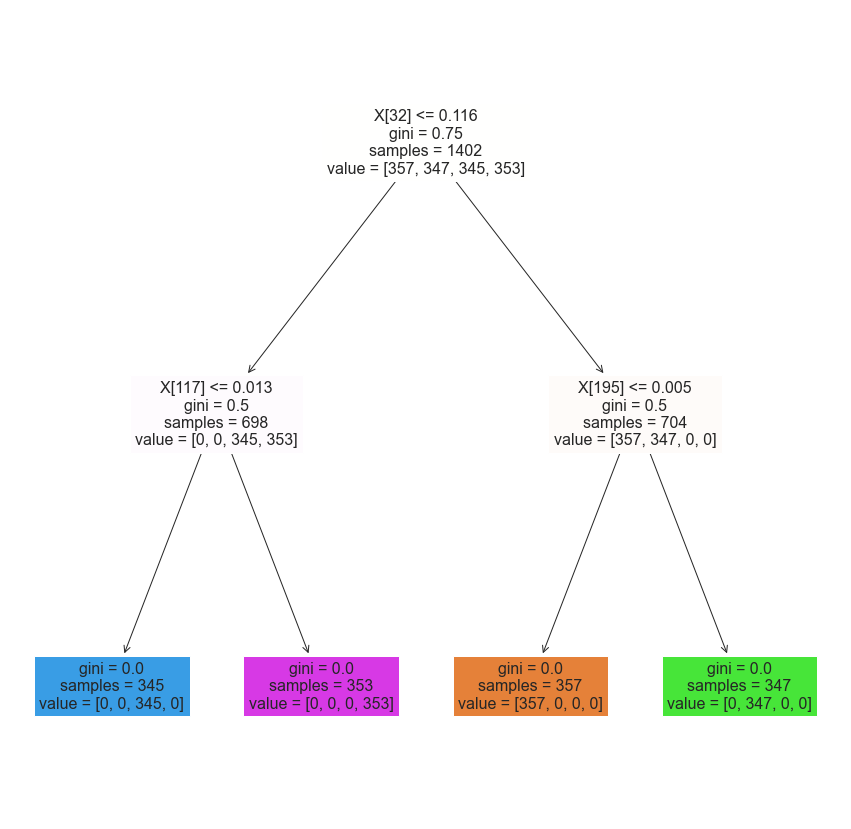

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

Accuracy:  1.0


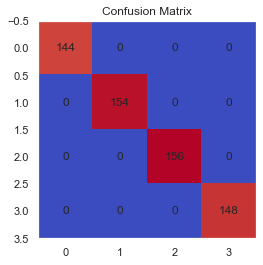

In [22]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

## k-NN

In [23]:
knns = []
for i in range(1, 21):
    knns.append(KNeighborsClassifier(n_neighbors = i))
    knns[-1].fit(x_train,y_train)

y_pred = np.array([knn.predict(x_test) for knn in knns])
accuracy = np.array([metrics.accuracy_score(y_test, y) for y in y_pred])
f1 = np.array([metrics.f1_score(y_test, y, average = 'macro') for y in y_pred])

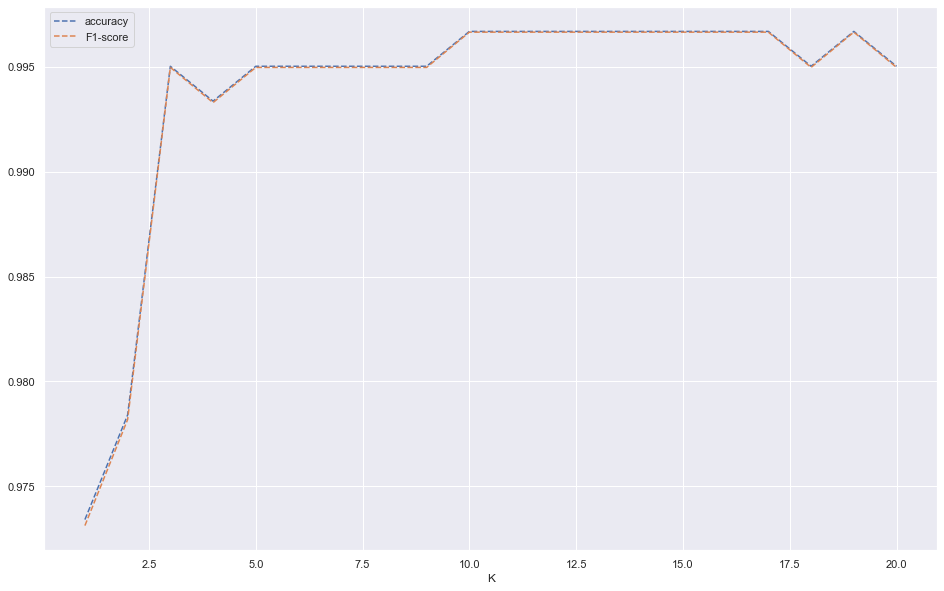

In [24]:
plt.figure(figsize = (16, 10))
plt.plot(range(1, 21), accuracy, '--', label = 'accuracy')
plt.plot(range(1, 21), f1, '--', label = 'F1-score')
plt.xlabel("K")
plt.legend()

In [25]:
accuracy.argmax(), f1.argmax()

(9, 9)

Definir o melhor $K$ não é trivial pois não existe um critério matemático/estatístico bem definido que permita ordenar de maneira absoluta os resultados encontrados. Entretanto, o $K = 9$ apresentou a melhor acurácia e melhor F1-score dentre os valores testados, deste modo, para efeito de simplificação, definiremos que este é o melhor valor para $K$ neste exemplo.

Accuracy:  0.9966777408637874


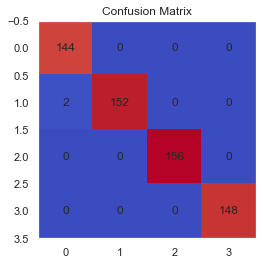

In [26]:
K = 13
print("Accuracy: ", accuracy[K - 1])
plot_confusion_matrix(y_test, y_pred[K - 1])